# SVM Regression

Besides linear and nonlinear classification, SVM algorithm also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting instances off the street.

## Linear SVR with hard margin

- Input: $\textbf{x}=(x_1,...,x_n)$
- Target: y
- Model parameter: $\textbf{w}=(w_1,...,w_n)$ and $b$
- Regression line (plane, hyperplane) is $y = \textbf{w}\cdot\textbf{x}^T + b$.
- margins of the street: $y = \textbf{w}\cdot\textbf{x}^T + b \pm \epsilon$.
- Small w <--> wide margin, large w <--> narrow margin.
- Hard margin: each instance $(x,y)$ must satisfy $-\epsilon \le y - \textbf{w}\cdot\textbf{x}^T - b \le \epsilon$
- Objective: minimize $\|\textbf{w}\|^2=\sum_{i=1}^nw_n^2.$

![title](Data/SVR_1.png)

## Linear SVR with soft margin

- Input: $\textbf{x}=(x_1,...,x_n)$
- Target: y
- Model parameter: $\textbf{w}=(w_1,...,w_n)$ and $b$
- Regression line (plane, hyperplane) is $y = \textbf{w}\cdot\textbf{x}^T + b$.
- margins of the street: $y = \textbf{w}\cdot\textbf{x}^T + b \pm \epsilon$.
- Small w <--> wide margin, large w <--> narrow margin.
- Soft margin: add extra cost to the objective function for each instance $(x,y)$ that is off the street.
- Objective: minimize $\|\textbf{w}\|=\sum_{i=1}^nw_n^2 + C\cdot\textit{ (cost from violations)}.$

![](Data/SVR_2.png)

## Non-linear SVR
- Use kernel functions to transform the data into a collection of new features.
- Linear kernel: identity transform
- Polynomial kernel: powers of features
- Gaussian RBF kernel: use each data point as a landmark and measure similarity
- Logistic kernel: equivalent to logistic regression

![](Data/SVR_5.png)

## SVR Demo: Predicting future stock prices

Data: Facebook data from yahoo.com. We use the daily stock price data for the recent one year.

Plan: 
- Model the price change with support vector regression. Use adjusted close price for each trading day.
- Split the data randomly as training set and test set.
- Run SVR on the training set, and measure the performance on test set by calculating the average distance between prediction and true price.


Remark: Our model is doomed to fail, not because the SVM regression is not powerful enough, but because our assumption is too superficial. But it is an interesting exercise nontheless.

![](Data/SVR_6.png)

In [6]:
# Load Facebook (FB) stock data from 
# https://finance.yahoo.com/quote/FB/history?p=FB
# Set up the time period to show the historical daily prices since one year ago, then download the data.
#
# Alternatively, the data can be obtained using yahoo-finance python API, see:
# https://pypi.python.org/pypi/yahoo-finance
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fb = pd.read_csv(os.getcwd() + '/Data/FB.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100
1,2017-04-12,139.720001,140.399994,139.440002,139.580002,139.580002,11612500
2,2017-04-13,139.619995,140.580002,139.330002,139.389999,139.389999,10965600
3,2017-04-17,139.759995,141.550003,139.750000,141.419998,141.419998,11519700
4,2017-04-18,141.270004,141.910004,140.610001,140.960007,140.960007,14807500


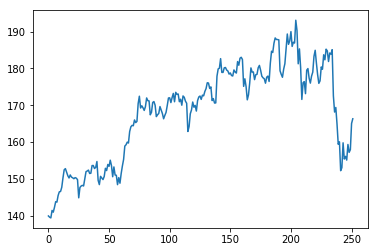

In [5]:
plt.plot(fb.index, fb['Adj Close'])
plt.show()

In [15]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [24]:
# Use sklearn.svm.LinearSVR to build the model
from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=15,
                  C=10)
model.fit(np.arange(len(fb.index)).reshape(-1,1),
           fb['Adj Close'])


LinearSVR(C=10, dual=True, epsilon=15, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

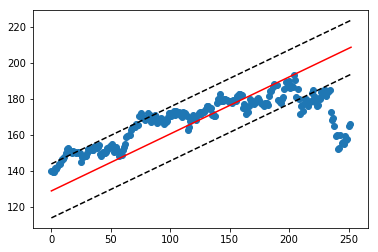

In [26]:
# Plot the regression margins
xs = np.linspace(0, len(fb.index), 100).reshape(-1, 1)
y_pred = model.predict(xs)
plt.plot(xs, y_pred, 'r-')
plt.plot(xs, y_pred + model.epsilon, 'k--')
plt.plot(xs, y_pred - model.epsilon, 'k--')
plt.scatter(np.arange(len(fb.index)),
            fb['Adj Close'])

# K-means cluster algorithm
**Unsupervised machine learning** is the machine learning task of inferring a function to describe hidden structure from "unlabeled" data. A typical example of unsupervised learning is **Clustering analysis**, which aims at grouping the data in such a way that instances in the same group are more similar to each other than to those in other groups.

### Real-world applications
- Geographical clustering to decide where to build signal towers, hospitals, restaurants, etc.
- Social network clustering to discover communities
- Recommendation system clustering: "people who likes xxx also like yyy ..."

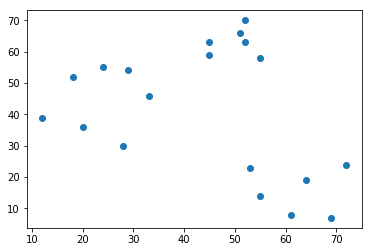

In [28]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

plt.scatter(df.x, df.y)
plt.show()

##  k-means clustering algorithm
 1. Create k inital means (cluster centers).
 2. Each data point is labeled by its closeset mean. Points with the same label forms a cluster.
 3. Assign the center of the k clusters as new k means.
 4. Repeat step 2 and step 3 until k means converge.

![](Data/K-means.gif)

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df[['x', 'y']])
df['label'] = model.predict(df[['x', 'y']])
df.head()

,x,y,label
0,12,39,2
1,20,36,2
2,28,30,2
3,18,52,2
4,29,54,2


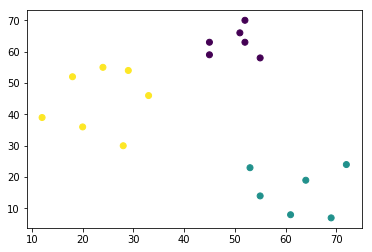

In [32]:
plt.scatter(df.x, df.y, c=df.label)

### Pros and cons
- (+) simple, easy to implemement;
- (+) easy to interpret the clustering results;
- (+) computationally efficient (what's its complexity?)
- (-) clusters tend to have similar size;
- (-) clusters tend to be shperical;
- (-) hard to predict the value of k;
- (-) sensitive to outliers
- (-) sensitive to initialization

## Next: Neural networks with TensorFlow
Try installing Tensorflow (instructions in Chapter 9, and also here: https://www.tensorflow.org/install/). CPU version is enough for this course.